Found 60000 images belonging to 10 classes.
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 45ms/step - accuracy: 0.2801 - loss: 1.9791
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.3885 - loss: 1.7042
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.4181 - loss: 1.6226
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.4395 - loss: 1.5668
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.4502 - loss: 1.5310
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.4610 - loss: 1.5053
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.4625 - loss: 1.5030
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.4749 - loss: 1.4710
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.4781 - loss: 1.4511
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.4874 - loss: 1.4383
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy

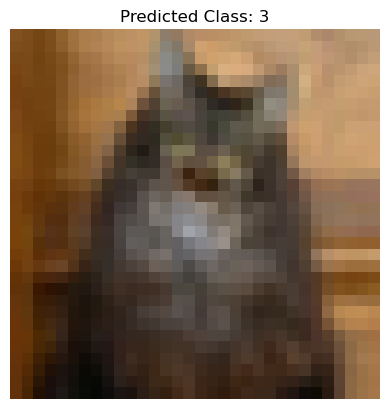

The model predicts this image as class: 3


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define parameters
data_dir = 'cifar'  # Path to your dataset folder
img_height, img_width = 32, 32  # CIFAR-10 images are 32x32 pixels
batch_size = 32

# Create an ImageDataGenerator for loading images
datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset from the directory
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' if labels are integers
    shuffle=True,
    seed=42
)

# Create a Feedforward Neural Network Model
model = Sequential([
    Flatten(input_shape=(img_height, img_width, 3)),  # Flatten the 32x32 images with 3 color channels
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons
    Dense(train_generator.num_classes, activation='softmax')  # Output layer for number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(train_generator)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make a prediction on a new image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0  # Rescale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

    return predicted_class

# Test with an example image from a specific class folder (e.g., 'cifar/0/img1.png')
test_image_path = 'cifar/3/image_26.png'
predicted_class = predict_image(test_image_path)
print(f"The model predicts this image as class: {predicted_class}")
